#Clasificador de Números

El presente proyecto se enfoca en un clasificador de nuemros, es una red la cual será entrenada para analizar y lograr clasificar una serie de números no tan claros, dentro de una escala de colores entre 0 y 250, esto con la ayuda del dataset openml.

Este proyecto se realiza a modo de autoestudio con la finalidad de mejorar las capacidades

Realizado por: *Luis Felipe Sanchez Sanchez*

Importación de librerias

In [1]:
#Importamos librerias
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Importación del dataset

In [2]:
#Importamos el dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

El numeto es 0


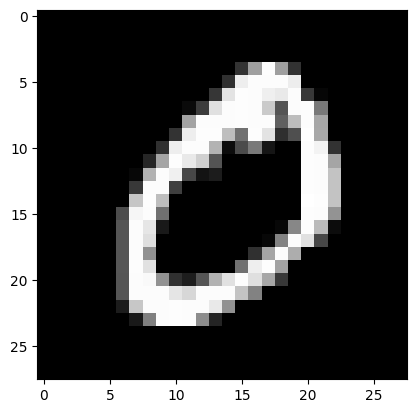

In [4]:
#Creamos variables target y x
x,y = mnist.data, mnist.target
#Generamos un numero al azar
rand_num = x.iloc[1]
rand_num = np.array(rand_num).reshape(28,28)
plt.imshow(rand_num, cmap='gray')

print('El numeto es '+(y.iloc[1]))

Limpieza de datos

In [5]:
#Convertimos Y a numeros enteros
y = y.astype(np.uint8)

In [6]:
#dividimos la parte de entremamiento y la parte testear el modelo
#dividimos la parte de entremamiento y la parte testear el modelo
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) # Corrected the order of variables

Entrenamiento del modelo

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [8]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([rand_num.flatten()]) # Flatten the image before prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

Evaluación del modelo

In [12]:
#usamos matriz de confusuón para medir la efectividad del modelo
from sklearn.metrics import confusion_matrix
y_pred = sgd_clf.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1300    0    0    5    6    3   14    1   33    0]
 [   0 1489    8   11    1    6   12    2   18    1]
 [   8   26 1019   65   36    3   81   13  120    2]
 [  10    7   21 1214    7   52   10    8   46    3]
 [   1    9    1    2 1345    2   11    3   13    7]
 [  16    6    1   55   45 1009   43    4   82    8]
 [  14    3    5    3   13   22 1325    0   23    0]
 [  11    8    6   47   35   10    0 1231   28   69]
 [   6   37    5   29   23   43   14    3 1268    1]
 [   5    5    5   78  226   31    0   34  107  903]]


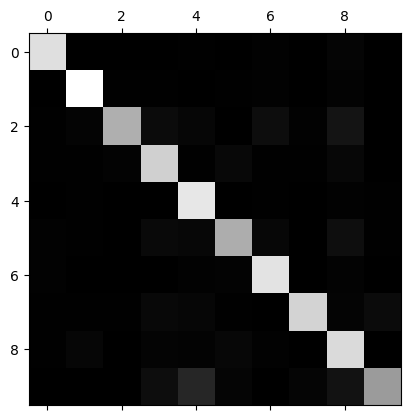

In [13]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

In [14]:
#Ahora usamos el modelo randomforest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
#mostralosla matriz de confusión con el randomforest
y_pred = rnd_clf.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1344    0    1    1    2    1    4    1    7    1]
 [   0 1523    9    7    1    2    3    2    1    0]
 [   2    0 1331    5    9    0    2   12   11    1]
 [   2    4   13 1312    1   13    1   15   13    4]
 [   2    2    4    0 1364    0    3    2    2   15]
 [   4    1    1   11    5 1223    7    2    8    7]
 [   6    5    3    0    5   17 1360    0   12    0]
 [   1    2   13    0    9    0    0 1402    2   16]
 [   3    4   10   14    5    8    5    1 1362   17]
 [   6    3    3   21   16    5    1    8    6 1325]]


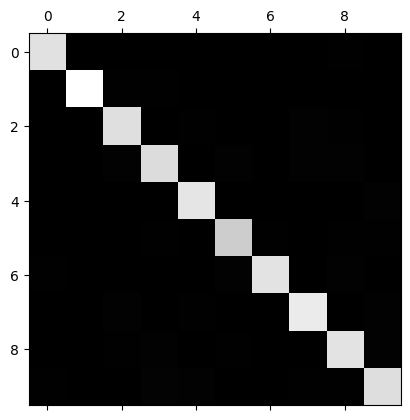

In [16]:
#La mostramos de forma grafica
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

##Conclusión

Una vez analizado podemos concluir que el mejor algoritmo de regtesión para este caso en especifico es el random forest, eso una vez analizada la matriz de confusión con los valores